# Making a network from scratch

## Outline
* Understanding the purpose of error in a simple learning machine
* Understanding network architecture
* Building a three layered network:
    - Linear Algebra
    - How weights are used in the network
    - How the network learns from error
* Implementing the network

### Simple learning machine
Let's assume a linear relationship between number of Uber employees in an elevator and the time it takes you to get to reach the 18th Floor.

![title](images/uber_example.jpg)


$$30=5x$$

How do we find x?

One way of solving this problem, is to directly find x, where $x=6$ (i.e., for every uber employee in the elevator, you should expect to wait an extra 6 seconds)

### Simple Learning Machine
A different way of solving this problem, is to pluck in a random value and see how wrong you are?

Let's use x=0.3

error = 30 - 5 * 0.3

error = 28.5

![title](images/uber_example2.jpg)


### Simple Learning Machine
Let's multiply the x by 20; 0.03*20=0.6

error = 30 - 5 * 0.6

error = 27

![title](images/uber_example3.jpg)

This is till not great. We doubled the guessed value, but our error decreased only by about 5% (1-27/28.5). If we really want to make some progress, we need to increase the value by a lot more. We can use the change in the error to figure out by how much x should increase.

### Things to remember:
* We used error to modify the value of x.
* We nudged the weight (x) based on how big our error was.
* We don't use algebra to find the relationship between input and output. Often we will not know what that relationship is (i.e., linear, non-linear), or there might be hundreds of weights to find (making the problem algebraically intractable). 

### A simple neuron ([source](http://cs231n.github.io/neural-networks-1/))

![title](images/neuron.png)

### Mathematical Formulation of the Neuron
![title](images/neuron_model.jpeg)

## Activation Functions

### Sigmoid Activation Function
![title](images/sigmoid.jpeg)

$$y=\frac{1}{1+e^{-x}}$$

* Can show saturation (e.g., this happens when the output of the neuron is a value very very close to 1 or 0. The neuron will effectively stop learning when that is the case.
* Does not zero center the output. This is an issue for deep neural architectures, since it will make gradient learning a bit more flakey. 

There are a lot more activation functions out there. See [this](https://stats.stackexchange.com/questions/115258/comprehensive-list-of-activation-functions-in-neural-networks-with-pros-cons) answer on CrossValidated. 

### A simple 3 layer network
![title](images/network.jpg)

## How signal travels through a network?

![title](images/2layer_simple.jpg)



Input to the first neuron in layer 2 is:
$$x=(1*0.4) + (-0.6*0.6)$$
$$x=0.04$$

Output is:
$$y(x)=\frac{1}{1+e^{-0.04}}$$
$$y(x)= 0.5099$$

Input to the second neuron in layer 2 is:
$$x=(1*0.9) + (-0.6*0.3)$$
$$x=0.72$$

Output is:
$$y(x)=\frac{1}{1+e^{-0.04}}$$
$$y(x)= 0.6726$$

### Brief Intro to Matrix Multiplication
$$\textbf{X}=\textbf{WI}$$


 $$
   W=
  \left[ {\begin{array}{cc}
   w_{1,1} & w_{2,1} \\
   w_{1,2} & w_{2,2} \\
  \end{array} } \right]
 $$
 
 $$
   I=
  \left[ {\begin{array}{cc}
   i_{1} \\
   i_{2} \\
  \end{array} } \right]
 $$

In [15]:
### matrix multiplication using numpy
import numpy as np
W = np.array([[0.4, 0.6], [0.9, 0.3]])
I = np.array([1, -0.6])
X=np.dot(W, I)
X

array([ 0.04,  0.72])

### Where are we?
![title](images/network_with_output.jpg)

How do we use error when multiple weights contribute to it?

### Updating Weights (aka, training)

![title](images/updating_weights.jpg)

### Updating Weights (aka, training)

The error is being split in fractions of relative error

$$Error_{w11} = e * \frac{W_{11}}{W_{11}+W_{21}}$$

$$Error_{w21} = e * \frac{W_{21}}{W_{11}+W_{21}}$$

### Backpropagating Errors
![title](images/error_backpropagation.jpg)

### Using Matrix Multiplication to Update Weights
 $$
   error_{hidden}=
  \left[ {\begin{array}{cc}
   \frac{w_{1,1}}{w_{1,1}+w_{2,1}} & \frac{w_{1,2}}{w_{1,2}+w_{2,2}} \\
   \frac{w_{2,1}}{w_{2,1}+w_{1,1}} & \frac{w_{2,2}}{w_{2,2}+w_{1,2}} \\
  \end{array} } \right]
  \cdot
   \left[ {\begin{array}{cc}
   e_{1} \\
   e_{2} \\
  \end{array} } \right]
 $$
 
 Although mathematically normalizing the weights is the right thing to do, in practice you can acctually ignore that. This makes matrix operations much simpler, with very little cost to the time it takes to train a network.
 

### Using Matrix Multiplication to Update Weights
$$error_{hidden}= W^{T}_{hidden} * error_{output}$$

You've gotten pretty far, so you should take a breather. 
![title](images/archer-meme-14.jpg)

What comes next is the hardest part of all, but we need to ge through it.
![title](images/justduit.jpg)

### How do we acctually update weights?
Remember at the start of the talk we used the rate of change in the error rates between two iterations to adjust parameter to number of Uber employees? We'll, that's not a good way of doing it.

* Normally we don't know what function we want to model (in that example we assumed a linear function with one parameter)
* The reality is that the error likely has a complex landscape


![title](images/error_landscape.png)



### Gradient Descent High Level Explanation
![title](images/gradient_descent_image.png)

We train the network multiple times (i.e., epochs) to make sure it does not get stuck at a local minima.

### Which error are we using for gradient descent?

* $(target-actual)$
* $|target-actual|$
* $(target-actual)^2$

### Which error are we using for gradient descent?
$$(target-actual)^2$$

* The error function is smooth and continuous
* The gradient gets smaller near the minimum, so we don't overshoot the objective
* The math is easy enough with this error

You can make your own customized cost functions that include weights or that punish the model for making strong inaccurate predictions (i.e., logloss). See more [here](https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications). You can find more about their implementation by examinining the [keras source code](https://keras.io/losses/).

### Gradient Descent
To do gradient descent, we need to figure out how the slope of the error relates to the change in weights. For this, we are going to use calculus.

$$\frac{\partial E}{\partial w_{jk}}$$

### Gradient Descent
![title](images/error_backpropagation2.jpg)


$$\frac{\partial E}{\partial w_{jk}}=\frac{\partial (t_{k}-o_{k})^2}{\partial w_{jk}}$$

note that $t$ is a constant, and $o_{k}$ depends on the weights $w_{jk}$

### Gradient Descent
We can rewrite
$$\frac{\partial E}{\partial w_{jk}} = \frac{\partial E}{\partial o_{k}} * \frac{\partial o_{k}}{\partial w_{jk}}$$

Taking the derivative of the error, we get:
$$\frac{\partial E}{\partial w_{jk}} = -2(t_{k}-o_{k}) * \frac{\partial o_{k}}{\partial w_{jk}}$$

$o_{k}$ also need to be differentiated. Remember that o_{k} is equal with:
$$S(\sum_{1}^{j} w_{jk}o_{j})$$
where, $S$ is the sigmoid.

Fortunately the derivative of the sigmoid is fairly easy to compute:
$$S(x) = S(x)(1-S(x))$$

### Gradient Descent
$$\frac{\partial E}{\partial w_{jk}} = -2(t_{k}-o_{k}) *  S(\sum_{1}^{j} w_{jk}o_{j}) * (1-S(\sum_{1}^{j} w_{jk}o_{j}))* \partial \frac{\sum_{1}^{j} w_{jk}o_{j}}{\partial w_{jk}}$$

We still have to take the derivative of the inner expression: $\sum_{1}^{j} w_{jk}o_{j}$

That comes to be $o_{j}$. Does anyone know why?

Our final expression comes to
$$\frac{\partial E}{\partial w_{jk}} = -(t_{k}-o_{k}) *  S(\sum_{1}^{j} w_{jk}o_{j}) * (1-S(\sum_{1}^{j} w_{jk}o_{j}))* o_{j}$$

Notice that we dropped the constant 2 because in the grand scheme of things it doesn't really channge much because, we we will see later, we use a **learning rate** parameter to adjust how fast the gradient should change.

### Gradient descent
 Let me rewquite the expression we just wrote in pseudo-english:
 
 $$\text{partial change in error for each partial change in weights} = -(error_{output}) *  sigmoid(output) * (1-sigmoid(output)) * o_{input}$$

### Gradient descent (weight updates)

When we update the weights, we don't adjust it using the full value of the gradient. We instead adjust it using a learning error paremeter.

$$ w_{jk} = w_{jk} - \alpha \frac{\partial E}{\partial w_{jk}} $$

### Example

![title](images/gradient_descent_example_with_numbers.jpg)

$$\frac{\partial E}{\partial w_{jk}} = -(t_{k}-o_{k}) *  S(\sum_{1}^{j} w_{jk}o_{j}) * (1-S(\sum_{1}^{j} w_{jk}o_{j}))* o_{j}$$

* Note that the erros above are not really realistic. When we apply the sigmoid transformation, our values will never be larger than 1, so if you get errors larger than 1 with sigmoids, then maybe your outcome is not made out of 1/0 as it should be.
* $-(t_{1}-o_{1})$ is equal to 1 for the first node. For the second node it is equal to 2.
* This expression $\sum_{j}^{1} w_{jk}o_{j}$ inside the sigmoid is equal to $3*0.8+2*0.6 = 3.6$ for the first output node and $2*0.8+2*0.6 = 2.8$ for the second output node. These are the inputs for the final layer.
* Taking the sigmoid is simple: $\frac{1}{1+e^{-3.6}} = 0.9734$ for the first node. For the second node, output will be $\frac{1}{1+e^{-}} = 0.9426758$
* the last part $o_{j}$ represents the output from the previous layer. In this case it is 0.8 ad 0.6.

In [16]:
import numpy as np
import scipy.special
# create the neural network
class network:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learning_rate):
        # set the number of nodes for each input, hidden, and output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # create weights linking the nodes from one layer to another
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # set the learning rate
        self.lr = learning_rate
        
        # set the activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
        
    
    def train(self, inputs_list, target_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        # calculate signals into the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the weights out of the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into the final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # get the output errror        
        output_errors = targets - final_outputs
        
        # hidden layer errors
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights using the backpropagation formula for the middle layer to final layer
        self.who += self.lr * np.dot((output_errors * final_outputs * (1-final_outputs)),
                                        np.transpose(hidden_outputs))
        
        # update the weights for the wih layer
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1-hidden_outputs)), np.transpose(inputs))
        
        pass
    
    def predict(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
        
        # calculate signals into the hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the weights out of the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into the final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [17]:
# read the train and test data
# you can get the data from here: https://www.kaggle.com/c/digit-recognizer/data
import pandas as pd
train = pd.read_csv('data/mnist_train.csv', header=None)
test = pd.read_csv('data/mnist_test.csv', header=None)

x_train = train.loc[:, 1:]
y_train = train.loc[:, 0]
x_test = test.loc[:, 1:]
y_test = test.loc[:, 0]

In [18]:
pd.set_option('display.max_columns', 30)
pd.DataFrame(np.array(x_train.iloc[1]).reshape(28, 28))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0


actual outcome value: 0


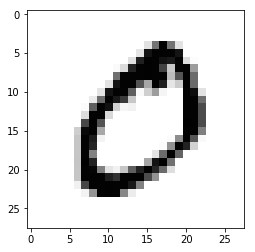

In [19]:
# plot an example
import matplotlib.pyplot as plt
%matplotlib inline

index = 1
image_array = np.asfarray(x_train.iloc[index].values.reshape((28, 28)))
plt.imshow(image_array, cmap='Greys', interpolation = 'None')
print("actual outcome value: {}".format(y_train[index]))

In [20]:
# scale the input
x_train_scaled = x_train/255 * 0.99 + 0.01
x_test_scaled = x_test/255 * 0.99 + 0.01

In [21]:
### Setting up the network
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.2

# create the instance of the model
net = network(input_nodes, hidden_nodes, output_nodes, learning_rate)


train_targets = np.zeros((len(y_train), output_nodes)) + 0.01
train_targets[np.array(range(0, len(y_train))), y_train.values] = 0.99

We are implementing a type of gradient descent called stochastic gradient descent. This basically means that we are updating the weights after each training example. There are other types of gradient descent, and I highly recommend reading this paper by [Ruder (2016)](https://arxiv.org/pdf/1609.04747.pdf) for an overview on different types of gradient descent.

Stochastic gradient descent has a few benefits.
* It is usually faster. You converge to an optimal solution in a few epochs. 
* You can implement the algorithm in online learning examples.

Obviously, it is not the best numerical optimization algorithm out there. I recommend reading about ADAM [(Kingma, Lei Ba 2015)](https://arxiv.org/pdf/1412.6980.pdf), which implements momentum and "memory" like strategies that allow for very rapid convergence with smaller likelihood at getting stuck within sub-optimal solutions. 

In [22]:
for features, outcome in zip(x_train_scaled.values, train_targets):
    net.train(inputs_list=features, target_list=outcome)

In [23]:
predictions = np.argmax(net.predict(x_test_scaled).T, axis=1)
accuracy = np.mean(predictions == y_test.values)
print("observed accuracy {}".format(accuracy*100))

observed accuracy 94.93


In [10]:
### train for more epochs
epochs = 4

for epoch in range(epochs):
    print("Starting epoch {}".format(epoch+1))
    for features, outcome in zip(x_train_scaled.values, train_targets):
        net.train(inputs_list=features, target_list=outcome)

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4


In [11]:
predictions = np.argmax(net.predict(x_test_scaled).T, axis=1)
accuracy = np.mean(predictions == y_test.values)
print("observed accuracy {}".format(accuracy*100))

observed accuracy 95.87


In [25]:
# Doing the same thing with an open source library: [Keras](https://keras.io/)
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


batch_size = 1
num_classes = 10
epochs = 2

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='sigmoid'))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 85s - loss: 0.0656 - acc: 0.6225 - val_loss: 0.0446 - val_acc: 0.8035
Epoch 2/2
60000/60000 [==============================] - 85s - loss: 0.0374 - acc: 0.8349 - val_loss: 0.0309 - val_acc: 0.8694
Test loss: 0.0309349358231
Test accuracy: 0.8694
